In [89]:
from lxml import etree

# 1 准确度的陷阱和混淆矩阵

In [90]:
import numpy as np
from sklearn  import datasets
from playML.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [91]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
y [digits.target==9]=1
y [digits.target!=9]=0
x_train,x_test,y_train,y_test = train_test_split(X,y,seed = 666)

In [92]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

d:\software\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
log_reg.score(x_test,y_test)

0.9610027855153204

In [94]:
y_log_predict = log_reg.predict(x_test)

In [95]:
def TN(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true==0) & (y_predict==0))

In [96]:
 TN(y_test,y_log_predict)

317

In [97]:
def FP(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true==0) & (y_predict==1))

In [98]:
FP(y_test,y_log_predict)

6

In [99]:
def FN(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true==1) & (y_predict==0))

In [100]:
FN(y_test,y_log_predict)

8

In [101]:
def TP(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true==1) & (y_predict==1))

In [102]:
TP(y_test,y_log_predict)

28

In [103]:
def confusion_matrix(y_true,predict):
    return np.array([
        [TN(y_true,predict),FP(y_true,predict)],
        [FN(y_true,predict),TP(y_true,predict)]
        ])

In [104]:
confusion_matrix(y_test,y_log_predict).flatten(2)

d:\software\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  """Entry point for launching an IPython kernel.


array([317,   8,   6,  28])

In [105]:
confusion_matrix(y_test,y_log_predict)

array([[317,   6],
       [  8,  28]])

# 调和平均值

In [106]:
def presion_score(y_true,predict):
    tp = TP(y_true,predict)
    fp = FP(y_true,predict)
    try :
        return tp/(tp+fp)
    except:
        return

In [107]:
presion_score(y_test,y_log_predict)

0.8235294117647058

In [108]:
def recall_score(y_true,predict):
    tp = TP(y_true,predict)
    fn = FN(y_true,predict)
    try :
        return tp/(tp+fn)
    except:
        return

In [109]:
recall_score(y_test,y_log_predict)

0.7777777777777778

In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
confusion_matrix(y_test,y_log_predict)

array([[317,   6],
       [  8,  28]], dtype=int64)

In [112]:
from sklearn.metrics import precision_score


In [113]:
precision_score(y_test,y_log_predict)

0.8235294117647058

In [114]:
from sklearn.metrics import recall_score

In [115]:
recall_score(y_test,y_log_predict)

0.7777777777777778

In [116]:
def f1_score(prescision,recall):
    try:
        return 2*(prescision*recall)/(prescision+recall)
    except:
        return

In [117]:
f1_score(1, 0.1)

0.18181818181818182

In [118]:
presion_score(y_test,y_log_predict)

0.8235294117647058

In [119]:
recall_score(y_test,y_log_predict)

0.7777777777777778

In [120]:
f1_score(presion_score(y_test,y_log_predict), recall_score(y_test,y_log_predict))

0.7999999999999999

In [121]:
from sklearn.metrics import f1_score

In [122]:
f1_score(y_test,y_log_predict)

0.7999999999999999

### 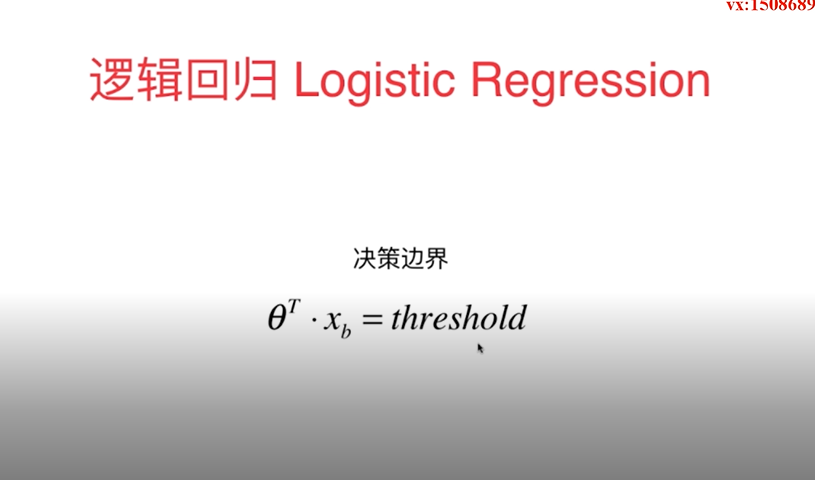

### 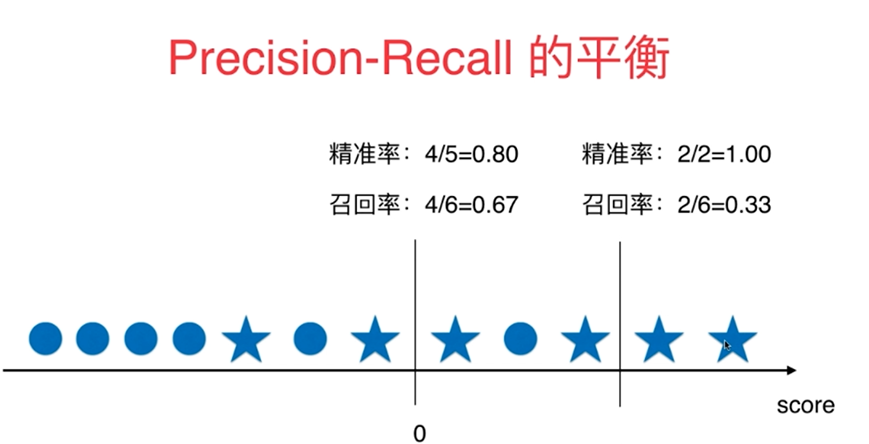

In [123]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

d:\software\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [124]:
log_reg.decision_function(x_test)[:10]# score 的值

array([-22.26927788, -37.50288295, -17.20887233, -88.46232996,
       -56.7007483 , -23.47668517, -50.14047872, -24.98080988,
        -0.4309385 , -16.32937097])

In [125]:
log_reg.predict(x_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [126]:
decision_scores =log_reg.decision_function(x_test)

In [127]:
print(min(decision_scores),max(decision_scores))

-92.01413335157122 22.140553087925955


In [128]:
y_predict_2 = np.array(decision_scores>=5,dtype='int')

In [129]:
confusion_matrix(y_test,y_predict_2)

array([[323,   0],
       [ 16,  20]], dtype=int64)

In [130]:
y_predict_2 = np.array(decision_scores>=-5,dtype='int')
confusion_matrix(y_test,y_predict_2)

array([[308,  15],
       [  3,  33]], dtype=int64)

# precision recall 的平衡

### 两者之间是相互矛盾的

In [131]:
import matplotlib.pyplot as plt

In [132]:
precisions =[]
recalls = []
thresholds = np.arange(np.min(decision_scores),np.max(decision_scores),0.1)

In [133]:
for i in thresholds:
    y_predict = np.array(decision_scores>=i,dtype = 'int')
    precisions.append(presion_score(y_test,y_predict))
    recalls.append(recall_score(y_test,y_predict))

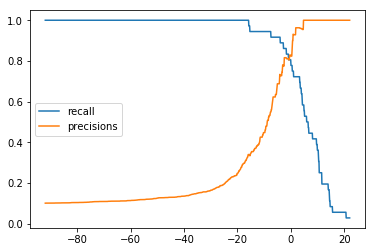

In [134]:
plt.plot(thresholds,recalls,label = 'recall')
plt.plot(thresholds,precisions,label = 'precisions')
plt.legend()

## sklearn 中的 precision recall 的曲线

In [135]:
from sklearn.metrics import precision_recall_curve

In [136]:
precisions,recalls,thresholds = precision_recall_curve(y_test,decision_scores)

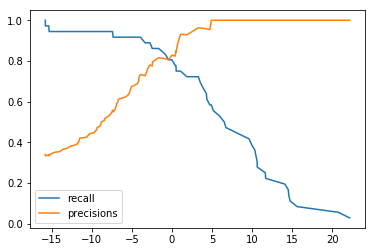

In [137]:
plt.plot(thresholds,recalls[:-1],label = 'recall')
plt.plot(thresholds,precisions[:-1],label = 'precisions')
plt.legend()

# ROC 曲线

### 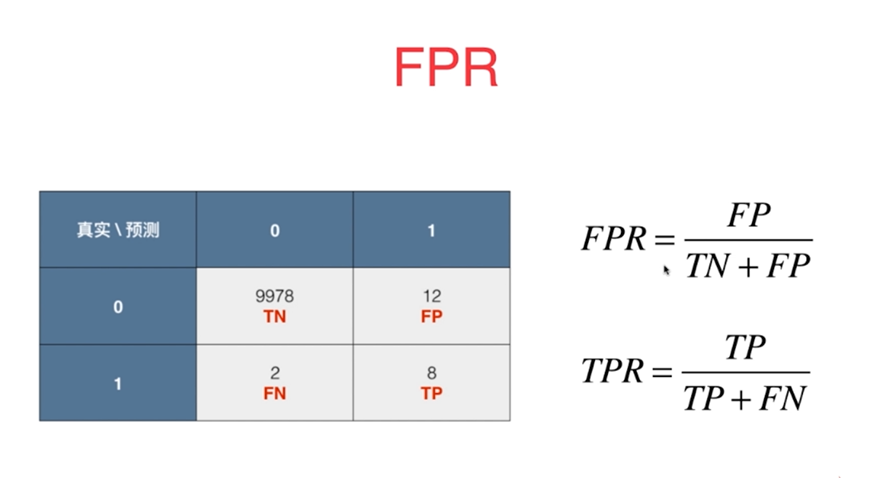

### 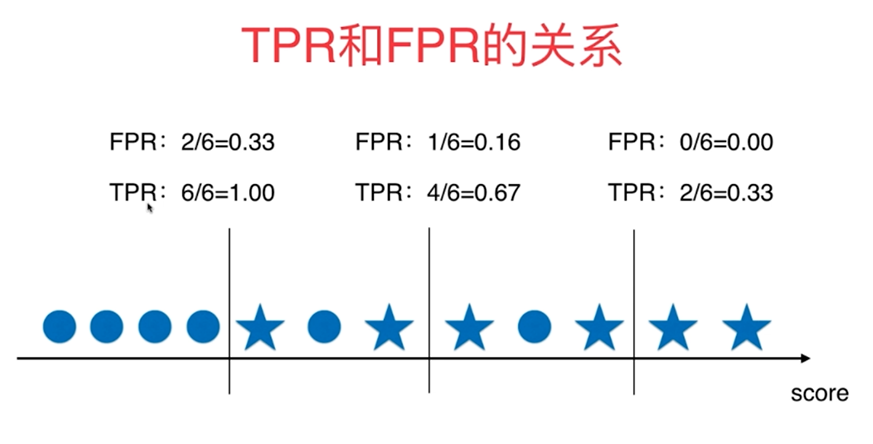

In [138]:
from playML.metrices import FPR
from playML.metrices import TPR

In [139]:
tprs =[]
fprs = []
thresholds = np.arange(np.min(decision_scores),np.max(decision_scores),0.1)
for i in thresholds:
    y_predict = np.array(decision_scores>=i,dtype = 'int')
    tprs.append(TPR(y_test,y_predict))
    fprs.append(FPR(y_test,y_predict))

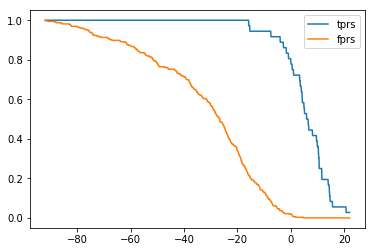

In [140]:
plt.plot(thresholds,tprs,label = 'tprs')
plt.plot(thresholds,fprs,label = 'fprs')
plt.legend()

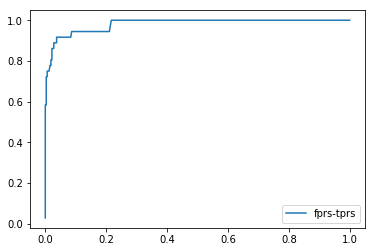

In [141]:
plt.plot(fprs,tprs,label = 'fprs-tprs')
plt.legend()

# sklearn 中的ROC

In [142]:
from sklearn.metrics import roc_curve

In [143]:

fprs,tprs ,thresholds = roc_curve(y_test,decision_scores)

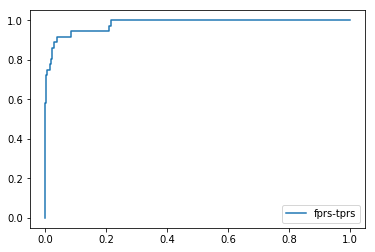

In [144]:
plt.plot(fprs,tprs,label = 'fprs-tprs')
plt.legend()

In [145]:
from sklearn.metrics import roc_auc_score

In [146]:
area = roc_auc_score(y_test,decision_scores)

In [147]:
print(area)

0.9812521499828001


###  ROC对有偏的数据是不太友好的

# 多分类的问题

In [148]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
x_train,x_test,y_train,y_test = train_test_split(X,y,seed = 666)

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
log_re = LogisticRegression()
log_re.fit(x_train,y_train)

d:\software\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\software\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [151]:
y_predict = log_re.predict(x_test)

In [152]:
log_re.score(x_test,y_predict)

1.0

In [153]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [167]:
precision_score(y_test,y_predict,average=None)

array([1.        , 0.90322581, 1.        , 0.90909091, 1.        ,
       0.90322581, 1.        , 1.        , 0.84090909, 0.96969697])

In [154]:
confusion_matrix(y_test,y_predict)

array([[37,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 34,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  1,  0,  0,  3,  0],
       [ 0,  1,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 28,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  1,  0,  2,  0,  0,  0,  0,  1, 32]], dtype=int64)

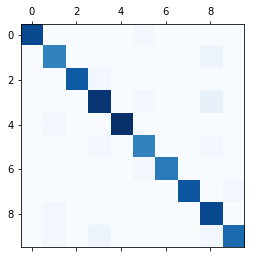

In [155]:
cfm = confusion_matrix(y_test,y_predict)
plt.matshow(cfm,cmap = plt.cm.Blues)

In [156]:
row_sum = np.sum(cfm,axis=0)

In [157]:
np.sum(cfm,axis=0)

array([37, 31, 34, 44, 41, 31, 29, 35, 44, 33], dtype=int64)